# Домашняя работа по регуляризации и оптимизации

Ниже приводится корпус данных с двумя метками: 1 и -1. К данным применяется линейная модель классификации:

$f(x, \theta) = x_1 \theta_1 + x_2 \theta_2 + \theta_3.$

Предлагается подобрать параметры $\theta$ минимизируя следующую функцию ошибки:

$\mathcal{L}(\theta) = 0.1 \|\theta\|^2 + \frac{1}{N}\sum\limits_{i=1}^N \max(0, 1 - y_i f(x_i, \theta)).$

Для оптимизации предлагается использовать метод градиентного спуска с 1000 шагами размера $0.1$ из начальной точки $(1, 1, 0)$.

In [5]:
import numpy as np
import yaml

In [6]:
X = np.array([
    [0, 1],
    [1, 1],
    [1, 0],
    [-0.5, 0.5],
    [0, -0.5]
])

y = np.array([1, 1, 1, -1, -1])

theta0 = np.array([1.0, 1.0, 0.0])

lr = 0.1

def f(X, theta):
    theta = np.asarray(theta)
    return (X * theta[:2]).sum(axis=-1) + theta[2]

def loss(X, y, theta):
    theta = np.asarray(theta)
    norm = (theta ** 2).sum()
    deltas = y * f(X, theta)
    return 0.1 * norm + np.mean(np.maximum(0, 1 - deltas))

print("Prediction:", f(X, theta0))
print("Loss:", loss(X, y, theta0))

Prediction: [ 1.   2.   1.   0.  -0.5]
Loss: 0.5


In [7]:
# Ваш код оптимизации.
theta = theta0
n = len(X)

def getDerivative(X, y, theta):
    derivative = np.zeros((3, n))
    maximum = np.array(np.zeros(n) < 1 - y * f(X, theta), dtype=int)
    X = np.hstack((X, np.ones((n, 1))))
    for i in range(3):
        derivative[i] = maximum * ((-1) * (y * X.T[i]))
    return derivative

for i in range(1000):
    derivative = getDerivative(X, y, theta)
    gradient = np.zeros(3)
    for i in range(3):
        gradient[i] = 0.1 * 2 * theta[i] + (1/n) * sum(derivative[i])
    theta = theta - lr * gradient
    

In [8]:
print("Prediction:", f(X, theta))
print("Loss:", loss(X, y, theta))

with open("submission.yaml", "w") as fp:
    yaml.safe_dump({"tasks": [{"task1": {"answer": theta.tolist()}}]}, fp)

Prediction: [ 0.75218494  2.00436988  1.00436988 -0.37390753 -0.74781506]
Loss: 0.48815643632236133


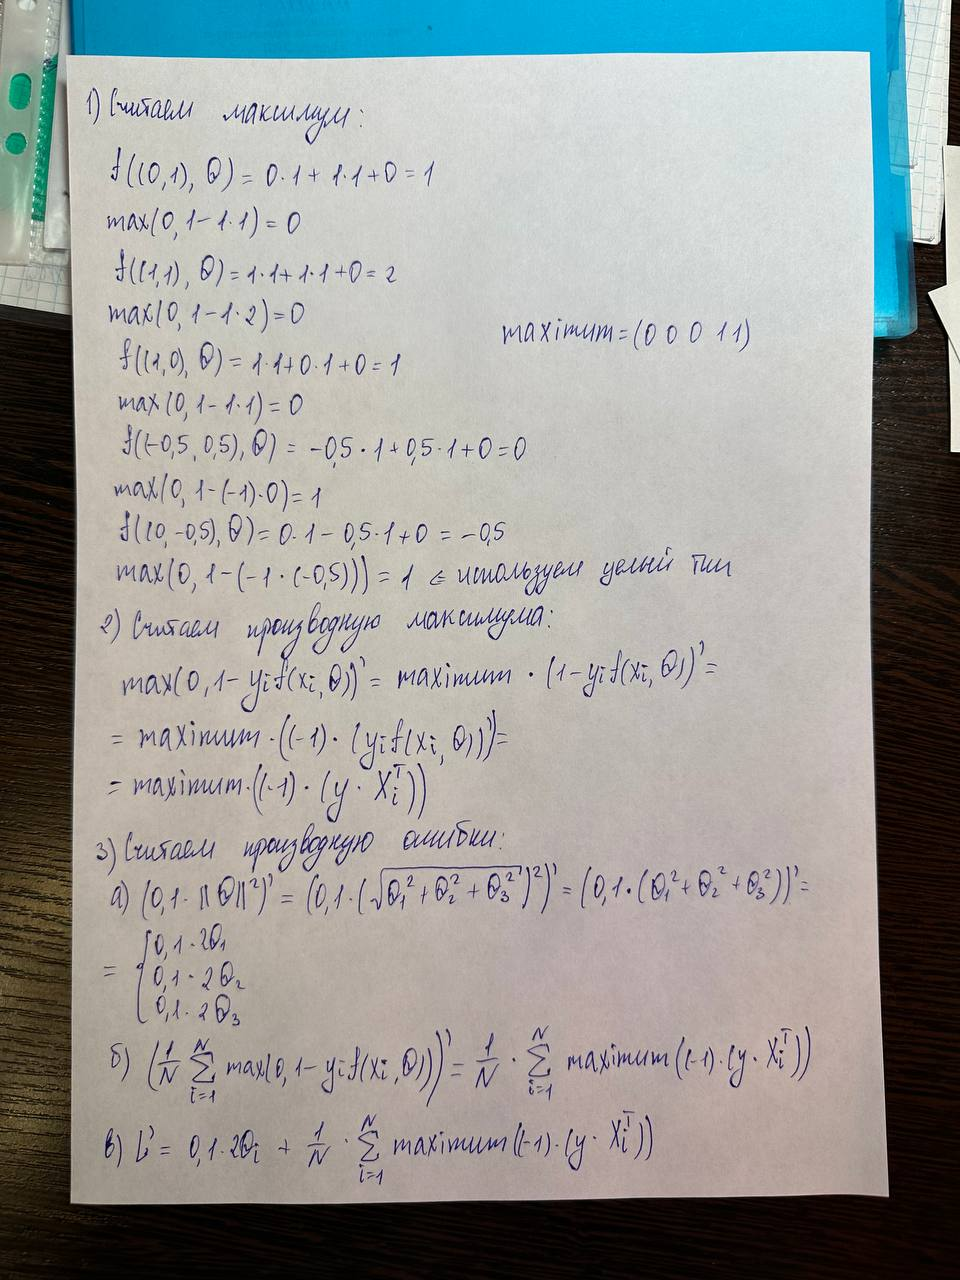